# Ice albedo feedback in the 0D energy balance model

**Credits: This notebook is based on a class exercise provided by Simona Bordoni (University of Trento) with additional ideas taken from lesson 6 of Brian Rose's climate modelling course at Albany.**

Consider the globally averaged energy balance equation for a planet whose surface temperature is $T_s$, this time no equilibrium is assumed, so the difference between the incoming and outgoing radiation leads to a temperature tendancy:
 
 \begin{equation}
  C \frac{dT_s}{dt} = \frac{S_0}{4} [ 1 - \alpha(T_s)]  - \epsilon_e \sigma T_s^4
\end{equation}
 
where $C$ is the heat capacity of our system (units J m$^{-2}$ K$^{-1}$), related mainly to the deep ocean (we come back to this later), and $\epsilon_e$ is the effective surface emissivity of the Earth (refer to lecture notes). 
 
Here the albedo of the planet $\alpha$ is now a function of global mean temperature rather than a fixed constant.  
Why is this?  Well, this is to mimic the feedback due to ice (although of course one could also try to represent other temperature sensitive albedo feedbacks such as land-surface cover, although difficult to do in such a simple model).  

As the temperature cools, more of the planet is assumed to be below the threshold for ice cover, increasing the global mean albedo.  This is represented by the following function:  

 \begin{equation}
  \alpha = 0.45 - 0.25 \,\mathrm{tanh} \left( \frac{(T-272)}{23} \right)
  \end{equation}
 
 Note that we don't actually know what the ice cover is in this model, we only know the final impact on albedo.  
 
 Let's take a look at this function by plotting it.


Text(0,0.5,'Albedo')

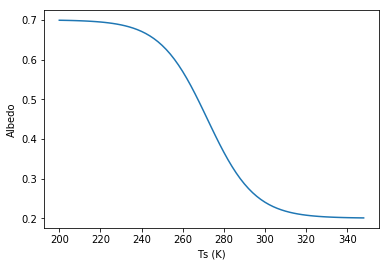

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# function to calculate alfa
def alpha(T):
    """ function for albedo"""
    albedo=0.45-0.25*np.tanh((T-272)/23)
    return albedo 

# vector of surface temperatures
Ts=np.arange(200,350,2)

# vector of albedos
fig,ax=plt.subplots()
ax.plot(Ts,alpha(Ts))
ax.set_xlabel("Ts (K)")
ax.set_ylabel("Albedo")

So we can see that for temperatures exceeding 300K roughly, the Earth becomes ice-free and the albedo tends to a fixed values of about 0.2.  As temperature cools the ice edge moves to the south, until for conditions below Ts=225K most of the globe is frozen and the albedo tends to 0.7.  

So now, rather than solve the equation, we are simply going to plot the RHS to get the sign of DT/Dt


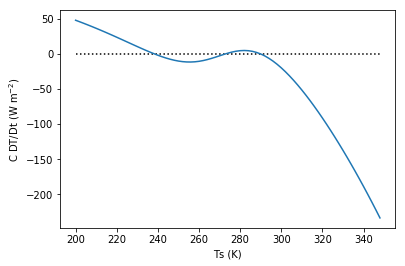

In [12]:
# constants needed
sigma=5.67e-8 # Stefan-B constant 
eps_e=0.61    # equivalent emissivity of surface: 1-eps/2

# define the solar constant array
S0today=1370 

# define the energy balance equation in a function
def cdTdt(S,T):
    return S*(1-alpha(T))/4 - eps_e*sigma*np.power(T,4)

# limits of temperature array we will need later:
tmin,tmax=np.min(Ts),np.max(Ts)

# plot
fig,ax=plt.subplots()
ax.plot(Ts,cdTdt(S0today,Ts))
ax.set_xlabel("Ts (K)")
ax.set_ylabel("C DT/Dt (W m$^{-2}$)")
ax.hlines(0,tmin,tmax,linestyles="dotted")

|**question 1: Where are the three equilibria temperatures and are they stable or unstable?**

When you have discussed this, we will go on to plot a contour plot of $C \frac{DT}{Dt}$ for a range of values for S0 and Ts, with S0 ranging  


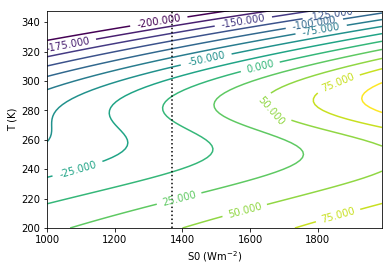

In [13]:
# define the solar constant array
S0=np.arange(1000,2000,10)

# make 2D arrays for contour plot:
T2d=np.tile(Ts,(len(S0),1)).transpose()
S2d=np.tile(S0,(len(Ts),1))

# contour plot
fig,ax=plt.subplots()
X=ax.contour(S0,Ts,cdTdt(S2d,T2d),levels=np.arange(-200,400,25))
ax.clabel(X,fontsize=10)
ax.set_xlabel("S0 (Wm$^{-2}$)")
ax.set_ylabel("T (K)")
ax.vlines(S0today,tmin,tmax,linestyles="dotted")

**Question 2: What happens to temperature if you reduce S0 from the present day value to 1000 Wm$^{-2}$?  If you then increase S0 to 1600 W m$^{-2}$, what happens?  Does the temperature trace the same path?**


**Question 3: Calculate the ice albedo feedback parameter and make a plot.

As for the Planck feedback we need to calculate the rate of change of flux imbalance with respect to temperature:

\begin{equation}
-\frac{\partial N}{\partial \alpha}\frac{\partial \alpha}{\partial T}=-\underbrace{\frac{-S0}{4}}_{\frac{\partial N}{\partial \alpha}}\underbrace{\frac{1}{4}\frac{1}{23}sech^2\frac{T-272}{23}}_{\frac{\partial \alpha}{\partial T}}
\end{equation}

which uses the trig relation $\frac{d tanh(x)}{dx}=sech^2(x)=\left(\frac{2}{e^x+e^{-x}}\right)^2$.

This gives


Text(0.5,0,'T (K)')

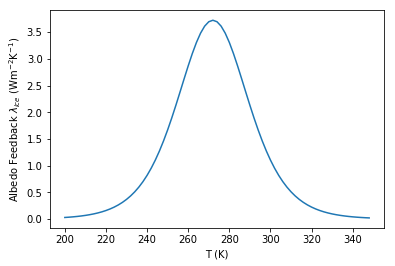

In [21]:
import math as mp
x=(Ts-272)/23

icefeedback=S0today*np.power(2.0/(np.exp(x)+np.exp(-x)),2)/(4*4*23)

fig,ax=plt.subplots()
ax.plot(Ts,icefeedback)
ax.set_ylabel("Albedo Feedback $\lambda_{ice}$ (Wm$^{-2}$K$^{-1}$)")
ax.set_xlabel("T (K)")


Note that the magnitude of the feedback is strongly dependent on the temperature, i.e. the ice albedo feedback strength is not an absolute but depends on the current state.  This makes sense if you think about it a little.  For example, at very cold temperatures when the world is ice covered, further decreases in temperature can not increase ice and do little to impact albedo, thus it is clear the feedback should be zero.  Likewise for warm temperatures when the world is ice free. 

** Question 4: Is the overall feedback (ice+albedo) ever unstable?**

Try to add the Planck feedback to the plot... 

256
280


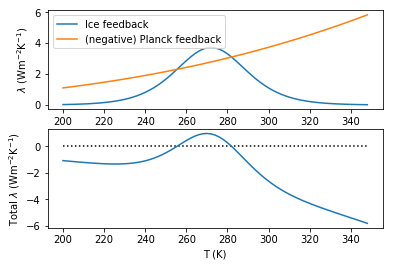

In [43]:
# add hline for magnitude of Planck
planckfeedback=-4.0*eps_e*sigma*np.power(Ts,3)

fig,ax=plt.subplots(nrows=2)
ax[0].plot(Ts,icefeedback,label="Ice feedback")
ax[0].plot(Ts,-planckfeedback,label="(negative) Planck feedback")
ax[0].set_ylabel("$\lambda$ (Wm$^{-2}$K$^{-1}$)")
ax[0].set_xlabel("T (K)")
ax[0].legend()

feedback=icefeedback+planckfeedback
ax[1].plot(Ts,feedback)
ax[1].hlines(0.0,tmin,tmax,linestyles="dotted")
ax[1].set_xlabel("T (K)")
ax[1].set_ylabel("Total $\lambda$ (Wm$^{-2}$K$^{-1}$)")

#
# rough estimate (to nearest 2K) of unstable regime bounds
#
print(Ts[np.argwhere(feedback>0).min()])
print(Ts[np.argwhere(feedback>0).max()])


We see that the system is indeed unstable between roughly 262 and 282 K.  

Lesson take home messages.